<a href="https://colab.research.google.com/github/yoosukyeong/Machine_Learning_basic/blob/main/PCA%EB%A1%9C_%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C%ED%95%98%EA%B8%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/yoosukyeong/Machine_Learning_basic/main/data/customer_pca.csv')

In [3]:
data.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3


In [4]:
variables = data.drop('label', axis = 1)
label = data['label']

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components = 2)

In [7]:
pca.fit(variables)

PCA(n_components=2)

In [8]:
comp = pca.transform(variables)

In [11]:
comp_df = pd.DataFrame(comp, columns = ['PC1', 'PC2'])

In [13]:
comp_df = comp_df.join(label)

<Axes: xlabel='PC1', ylabel='PC2'>

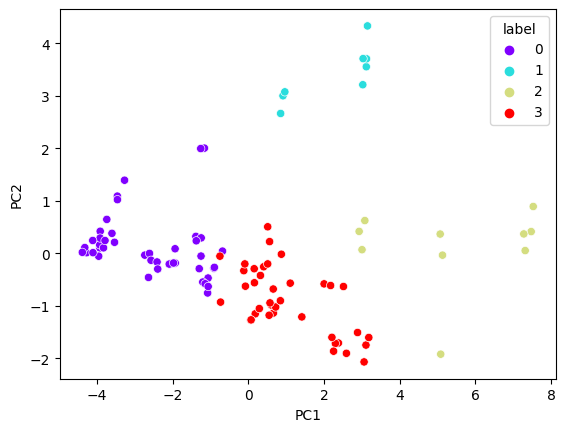

In [15]:
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'label', data = comp_df, palette= 'rainbow')

In [16]:
pca.components_

array([[ 0.3484681 ,  0.32447242,  0.30303652,  0.14186907,  0.30618347,
         0.31297263,  0.29718852,  0.3045823 ,  0.29341337,  0.30287672,
         0.32053447,  0.08927503],
       [ 0.05827591,  0.06034266,  0.15264674, -0.54435586,  0.03109502,
         0.03790586,  0.23809571, -0.2315275 , -0.2471928 , -0.20898284,
         0.14479001,  0.65946781]])

In [21]:
pca_df = pd.DataFrame(pca.components_, columns = variables.columns, index = ['pc_1', 'pc_2'])

In [22]:
pca_df

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
pc_1,0.348468,0.324472,0.303037,0.141869,0.306183,0.312973,0.297189,0.304582,0.293413,0.302877,0.320534,0.089275
pc_2,0.058276,0.060343,0.152647,-0.544356,0.031095,0.037906,0.238096,-0.231528,-0.247193,-0.208983,0.144790,0.659468


<Axes: >

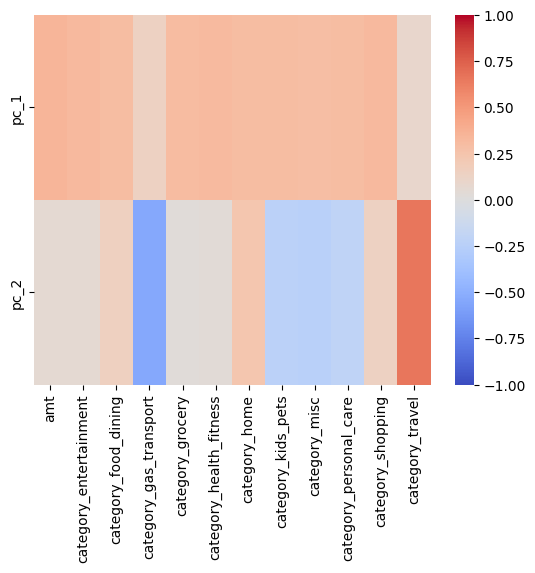

In [23]:
sns.heatmap(pca_df, cmap = 'coolwarm', vmin = -1, vmax = 1)